In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
Data_df = pd.read_csv('Data.csv')
State_df = pd.read_csv('State_data.csv')
Funding_df = pd.read_csv(r"C:\Users\heetp\OneDrive\Desktop\NCAP_Funding.csv")

# Spatial Aggregation

In [4]:
#Question 1
avg_pm25 = Data_df.groupby('state')['PM2.5'].mean()
state_with_highest_avg = avg_pm25.idxmax()
print(state_with_highest_avg)

Delhi


In [6]:
#Question 2
Data_df['Timestamp'] = pd.to_datetime(Data_df['Timestamp'])
hazardous_data = Data_df[(Data_df['PM2.5'] > 300) & (Data_df['Timestamp'].dt.year == 2023)]
state_with_max_count = hazardous_data['state'].value_counts().idxmax()
print(state_with_max_count)


Delhi


In [13]:
#Question 3
year_2023 = Data_df['Timestamp'].dt.year == 2023
std_of_pm25 = Data_df[year_2023].groupby('state')['PM2.5'].std()
max_variance = std_of_pm25.idxmax()
print(max_variance)

Delhi


In [10]:
#Question 4
years = [2020,2021]
year_2021_2020 = Data_df['Timestamp'].dt.year.isin(years)
avg_in_covid = Data_df[year_2021_2020].groupby('state')['PM2.5'].mean()
state_with_low_avg = avg_in_covid.idxmin()
print(state_with_low_avg)

Mizoram


# Temporal Aggregation

In [12]:
#Question 1
Data_df['Timestamp'] = pd.to_datetime(Data_df['Timestamp'])
aug_2020 = Data_df[(Data_df['Timestamp'].dt.month == 8) & (Data_df['Timestamp'].dt.year == 2020)]
index_with_highest_value = aug_2020['PM2.5'].idxmax()
station_with_highest_value = Data_df.iloc[index_with_highest_value]['station']
print(station_with_highest_value)

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


In [17]:
#Question 2
year_2018 = Data_df[Data_df['Timestamp'].dt.year == 2018]
winter_months = [1,2,12]
summer_months = [3,4,5]
monsoon_months = [6,7,8,9]
station = year_2018['station']== 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'
winter_2018 = (year_2018['Timestamp'].dt.month.isin(winter_months)) & (station)
summer_2018 = (year_2018['Timestamp'].dt.month.isin(summer_months)) & (station)
monsoon_2018 = (year_2018['Timestamp'].dt.month.isin(monsoon_months)) & (station)
avg_winter = year_2018[winter_2018]['PM2.5'].dropna().mean()
avg_summer = year_2018[summer_2018]['PM2.5'].dropna().mean()
avg_monsoon = year_2018[monsoon_2018]['PM2.5'].dropna().mean()
print(f"{avg_winter} is the winter average")
print(f"{avg_summer} is the summer average")
print(f"{avg_monsoon} is the monsoon average")

67.49234436344778 is the winter average
nan is the summer average
34.42519611317571 is the monsoon average


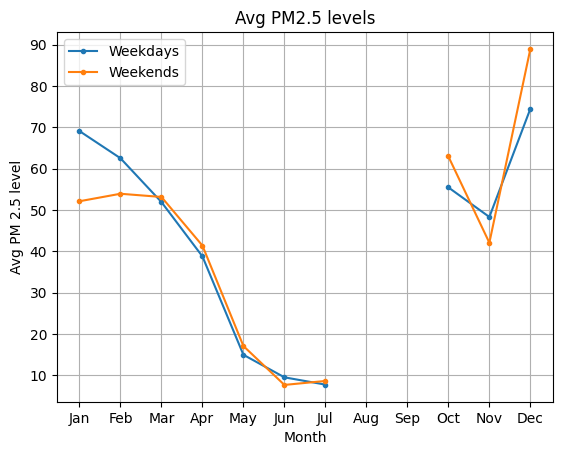

In [ ]:
#Question 3
# weekday indices {mon,tue,wed,thur,fri,sat,sun} = {0,1,2,3,4,5,6}

Data_df['Timestamp'] = pd.to_datetime(Data_df['Timestamp'])
year_2021 = Data_df[Data_df['Timestamp'].dt.year == 2021]
station = year_2021['station']== 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'
weekdays = [0,1,2,3,4]
weekends = [5,6]
months = [1,2,3,4,5,6,7,8,9,10,11,12]

avg_list_weekdays = []
avg_list_weekends = []
month_array = np.array(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

for i in months:
    monthly = year_2021['Timestamp'].dt.month==i
    weekdays_month = year_2021['Timestamp'].dt.dayofweek.isin(weekdays) & station & monthly
    weekends_month = year_2021['Timestamp'].dt.dayofweek.isin(weekends) & station & monthly

    avg_value_weekdays = year_2021[weekdays_month]['PM2.5'].mean()
    avg_value_weekends = year_2021[weekends_month]['PM2.5'].mean()

    avg_list_weekdays.append(avg_value_weekdays)
    avg_list_weekends.append(avg_value_weekends)

avg_array_weekdays = np.array(avg_list_weekdays)
avg_array_weekends = np.array(avg_list_weekends)

plt.plot(month_array,avg_array_weekdays,label = 'Weekdays',marker = '.')
plt.plot(month_array,avg_array_weekends,label = 'Weekends', marker = '.')
plt.title('Avg PM2.5 levels')
plt.xlabel('Month')
plt.ylabel('Avg PM 2.5 level')
plt.grid()
plt.legend()
plt.show()

# Spatio -Temporal 

In [ ]:
#Question 1
summer_months = [3,4,5]
monsoon_months = [6,7,8,9]

Data_df['Timestamp'] = pd.to_datetime(Data_df['Timestamp'])
year_2022 = Data_df[Data_df['Timestamp'].dt.year==2022]
monsoon_2022 = year_2022['Timestamp'].dt.month.isin(monsoon_months)
summer_2022 = year_2022['Timestamp'].dt.month.isin(summer_months)
monsoon_avg_state = year_2022[monsoon_2022].groupby('state')['PM2.5'].mean()
summer_avg_state = year_2022[summer_2022].groupby('state')['PM2.5'].mean()
diff = monsoon_avg_state - summer_avg_state
abs_percentage_change = np.abs((diff/summer_avg_state)*100)
state_with_max =  abs_percentage_change.idxmax()
print(state_with_max)

Assam


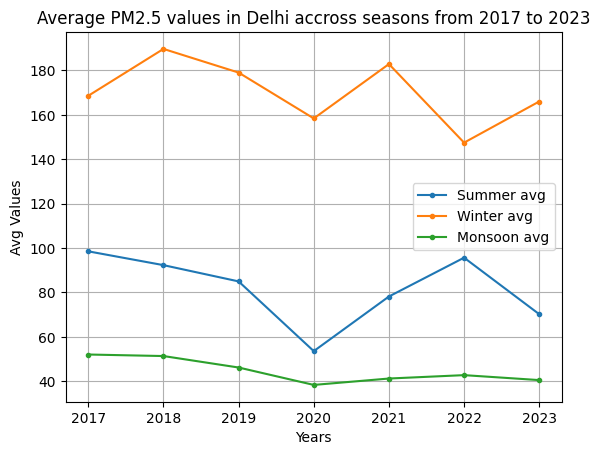

In [5]:
#Question 2
Data_df['Timestamp'] = pd.to_datetime(Data_df['Timestamp'])
years = [2017,2018,2019,2020,2021,2022,2023]
delhi_station = Data_df['state'] == 'Delhi'
avg_summer = []
avg_winter = []
avg_monsoon = []
summer_months = [3,4,5]
monsoon_months = [6,7,8,9]
winter_months = [1,2,12]

summer = Data_df['Timestamp'].dt.month.isin(summer_months) 
winter = Data_df['Timestamp'].dt.month.isin(winter_months) 
monsoon = Data_df['Timestamp'].dt.month.isin(monsoon_months) 

for i in years:
    year = Data_df['Timestamp'].dt.year== i 
    summer_avg = Data_df[year & summer & delhi_station]['PM2.5'].mean()
    winter_avg = Data_df[year & winter & delhi_station]['PM2.5'].mean()
    monsoon_avg = Data_df[year & monsoon & delhi_station]['PM2.5'].mean()

    avg_winter.append(winter_avg)
    avg_summer.append(summer_avg)
    avg_monsoon.append(monsoon_avg)

array_summer = np.array(avg_summer)
array_winter = np.array(avg_winter)
array_monsoon = np.array(avg_monsoon)
years_array = np.array(years)

plt.plot(years_array,array_summer,label = 'Summer avg',marker = '.')
plt.plot(years_array,array_winter,label ='Winter avg',marker = '.')
plt.plot(years_array,array_monsoon,label = 'Monsoon avg',marker = '.')
plt.legend()
plt.title('Average PM2.5 values in Delhi accross seasons from 2017 to 2023')
plt.ylabel('Avg Values')
plt.xlabel('Years')
plt.grid()
plt.show()

# Delhi PM2.5 concentrations between 2017 and 2023 exhibit a distinct seasonality: highest in winter due to temperature inversion and agricultural burning, moderate in summer with improved dispersion, and lowest in the monsoon as rain clears out pollutants, reflecting the dominating influence of weather on air quality.

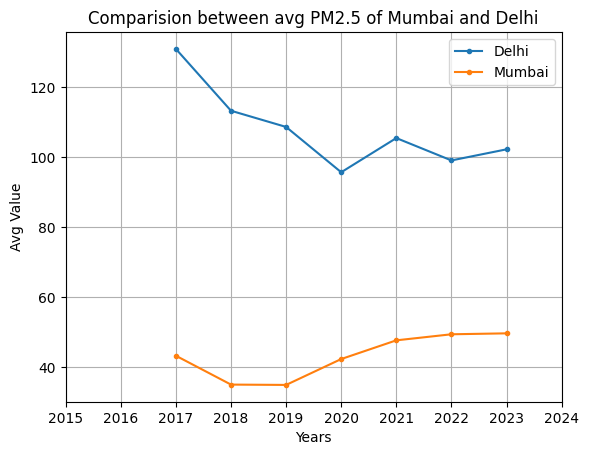

In [11]:
#Question 3

years_reqd = [2017,2018,2019,2020,2021,2022,2023]
delhi_station = Data_df['city'] == 'Delhi'
mumbai_station = Data_df['city'] == 'Mumbai'
avg_delhi=[]
avg_mumbai=[]

for i in years_reqd:
    year = Data_df['Timestamp'].dt.year == i
    avg_delhi_values = Data_df[year & delhi_station]['PM2.5'].mean()
    avg_mumbai_values = Data_df[year & mumbai_station]['PM2.5'].mean()

    avg_delhi.append(avg_delhi_values)
    avg_mumbai.append(avg_mumbai_values)

delhi_array = np.array(avg_delhi)
mumbai_array = np.array(avg_mumbai)
years_array = np.array(years_reqd)

plt.plot(years_array,delhi_array,label='Delhi',marker = '.')
plt.plot(years_array,mumbai_array,label='Mumbai',marker ='.')
plt.xlabel('Years')
plt.ylabel('Avg Value')
plt.xlim(2015,2024)
plt.title('Comparision between avg PM2.5 of Mumbai and Delhi')
plt.legend()
plt.grid()
plt.show()

# Delhi had higher PM2.5 variations between 2017 and 2023 with increased winter peaks caused by events such as crop burning and Diwali firecrackers. Mumbai levels were more consistent and controlled mainly by coastal winds and monsoon rains, which assist in dispersing pollutants and mitigating seasonal differences relative to Delhi.

# Population Based

In [ ]:
#Question 1
Data_df['Timestamp'] = pd.to_datetime(Data_df['Timestamp'])
state_freq = pd.DataFrame(Data_df['state'].value_counts().reset_index())
state_freq.columns = ['State','Frequency']
new_df = pd.merge(state_freq,State_df,on = 'State', how = 'inner' )
new_df['Ratio'] = new_df['Frequency']/new_df['Population']
#state with highest no.of monitoring stations wrt population
highest_ratio_state = new_df.loc[new_df['Ratio'].idxmax()]
print(highest_ratio_state['State'])

Chandigarh


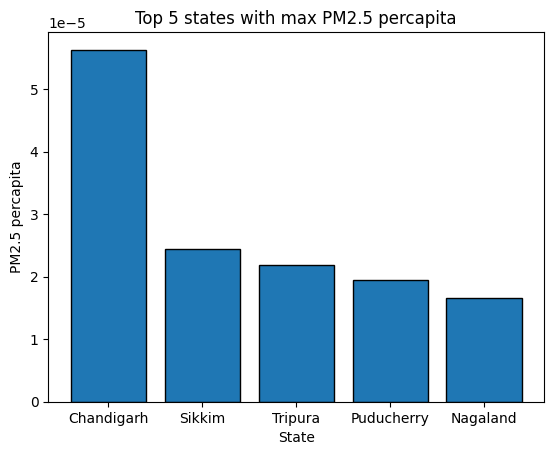

In [19]:
#Question 2
Data_df['Timestamp'] = pd.to_datetime(Data_df['Timestamp'])
year_2023 = Data_df[Data_df['Timestamp'].dt.year == 2023]
avg_values = year_2023.groupby('state')["PM2.5"].mean().reset_index()
avg_values.columns = ['State','Avg PM2.5']
merged_data = pd.merge(avg_values,State_df,on='State',how='inner')
merged_data['Ratio_2'] = merged_data['Avg PM2.5']/merged_data['Population']
in_order = merged_data.sort_values('Ratio_2',ascending=False)
top_5_states = in_order.head(5)
plt.bar(top_5_states['State'],top_5_states['Ratio_2'],edgecolor='black')
plt.xlabel('State')
plt.ylabel('PM2.5 percapita')
plt.title('Top 5 states with max PM2.5 percapita')
plt.show()

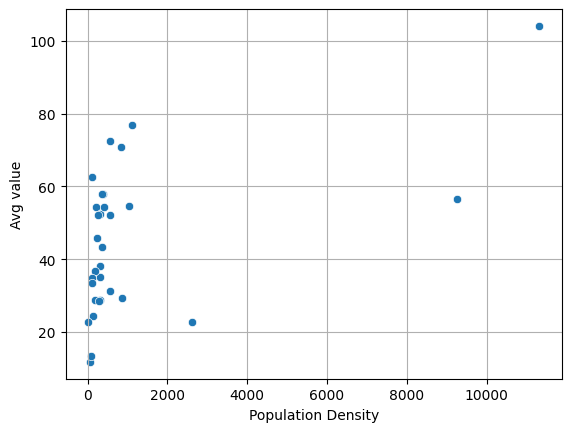

In [16]:
#Question 3
State_df['Population Density'] = State_df['Population']/State_df['Area (km2)']
avg_pm25 =  Data_df.groupby('state')['PM2.5'].mean().reset_index()
avg_pm25.columns = ['State','Avg value']
new_df = pd.merge(State_df,avg_pm25,on='State',how='inner')
sns.scatterplot(data=new_df, x="Population Density", y="Avg value")
#sns.regplot(data=new_df, x="Population Density", y="Avg value", scatter=False, color="red")
plt.grid()
plt.show()

# Area Based

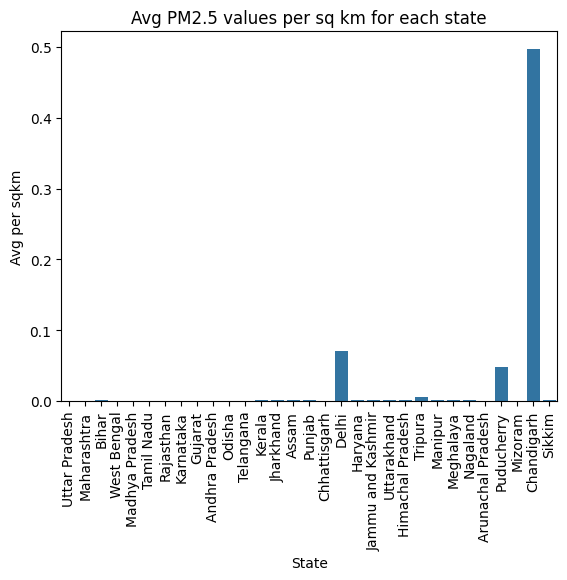

In [18]:
#Question 1
new_df['Avg per sqkm'] = new_df['Avg value']/new_df['Area (km2)']
sns.barplot(data = new_df, x ='State',y = 'Avg per sqkm')
plt.title('Avg PM2.5 values per sq km for each state')
plt.xticks(rotation = 90)
plt.show()

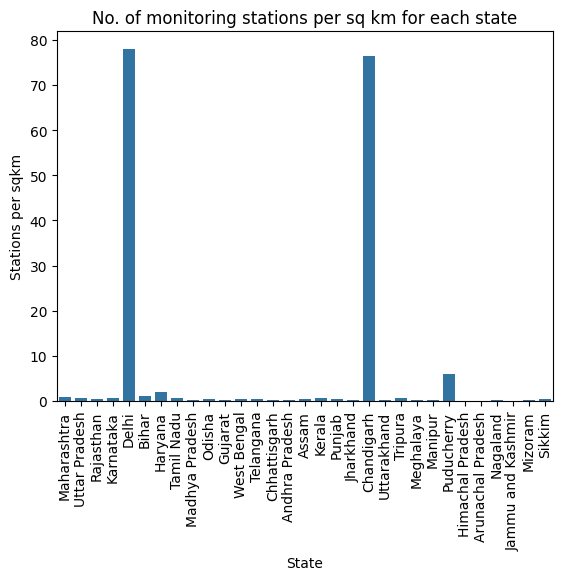

In [270]:
#Question 2
state_freq = pd.DataFrame(Data_df['state'].value_counts().reset_index().dropna())
state_freq.columns = ['State','Frequency']
new_data = pd.merge(state_freq,State_df,on = 'State', how = 'inner' )
new_data['Stations per sqkm'] = new_data['Frequency']/new_data['Area (km2)']
sns.barplot(data = new_data, x = 'State' , y = 'Stations per sqkm')
plt.title('No. of monitoring stations per sq km for each state')
plt.xticks(rotation = 90)
plt.show()

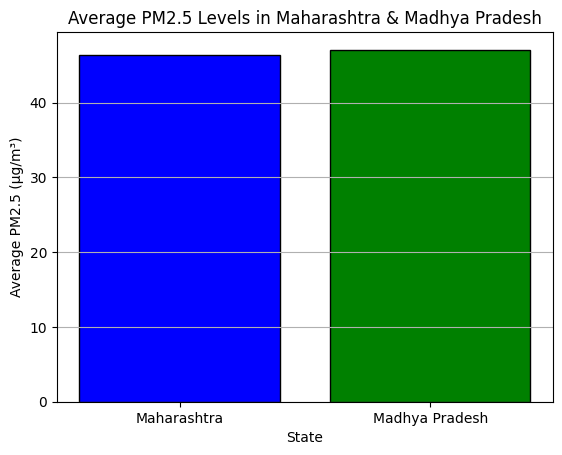

In [26]:
# Question 3

Data_df['Timestamp'] = pd.to_datetime(Data_df['Timestamp'])
year_2021 = Data_df[Data_df['Timestamp'].dt.year == 2021]

State_df['Population Density'] = State_df['Population']/State_df['Area (km2)']
avg_pm25 =  year_2021.groupby('state')['PM2.5'].mean().reset_index()
avg_pm25.columns = ['State','Avg value']

new_df = pd.merge(State_df,avg_pm25,on='State',how='inner')
new_df = new_df[(new_df['State'] == "Maharashtra") | (new_df['State'] == "Madhya Pradesh")]

plt.bar(new_df['State'], new_df['Avg value'], color=['blue', 'green'], edgecolor='black')
plt.xlabel('State')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.title('Average PM2.5 Levels in Maharashtra & Madhya Pradesh')
plt.grid(axis='y')
plt.show()

# Funding Based

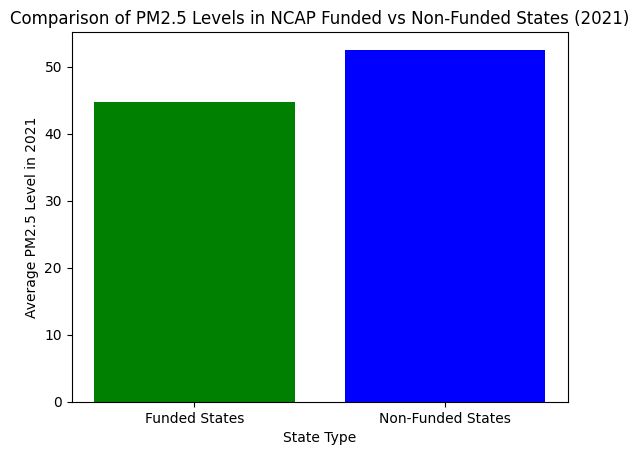

In [20]:
# Question 1


Data_df["Timestamp"] = pd.to_datetime(Data_df["Timestamp"])
data_2021 = Data_df[Data_df["Timestamp"].dt.year == 2021]

pm25_by_state = data_2021.groupby("state")["PM2.5"].mean().reset_index()
pm25_by_state.columns = ["State", "Avg_PM2.5"]   

ncap_funding_df = Funding_df[["State", "Amount released during FY 2021-22"]].copy()
ncap_funding_df.columns = ["State","Funding_2021"]
ncap_funding_df["Funding_2021"] = pd.to_numeric(ncap_funding_df["Funding_2021"], errors='coerce')

ncap_funding_df["Funded"] = ncap_funding_df["Funding_2021"].notna() & (ncap_funding_df["Funding_2021"] > 0)

merged_df = pm25_by_state.merge(ncap_funding_df[["State", "Funded"]], on="State", how="left")
pd.set_option('future.no_silent_downcasting', True)
merged_df["Funded"] = merged_df["Funded"].fillna(False).astype(bool)

avg_pm25_funded = merged_df[merged_df["Funded"]]["Avg_PM2.5"].mean()
avg_pm25_non_funded = merged_df[~merged_df["Funded"]]["Avg_PM2.5"].mean()

plt.bar(["Funded States", "Non-Funded States"], [avg_pm25_funded, avg_pm25_non_funded], color=['green', 'blue'])
plt.xlabel("State Type")
plt.ylabel("Average PM2.5 Level in 2021")
plt.title("Comparison of PM2.5 Levels in NCAP Funded vs Non-Funded States (2021)")
plt.show()


C:\Users\heetp\AppData\Local\Temp\ipykernel_21980\2783089240.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  assam_combined["Funding"].fillna(0, inplace=True)  # Replace missing values with 0


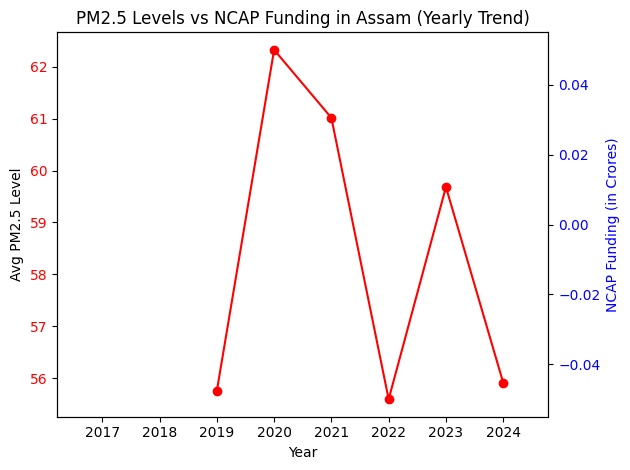

In [27]:
# Question-2

assam_pm25 = Data_df[Data_df["state"] == "Assam"].copy()
assam_pm25["Timestamp"] = pd.to_datetime(assam_pm25["Timestamp"])
assam_pm25["Year"] = assam_pm25["Timestamp"].dt.year

assam_pm25_avg = assam_pm25.groupby("Year")["PM2.5"].mean().reset_index()

funding_cols = [col for col in Funding_df.columns if "Amount released during FY" in col]
assam_funding = Funding_df[Funding_df["State"] == "Assam"][funding_cols]

assam_funding = assam_funding.melt(var_name="Year", value_name="Funding")
assam_funding["Year"] = assam_funding["Year"].str.extract(r"(\d{4})").astype(int)
assam_funding["Funding"] = pd.to_numeric(assam_funding["Funding"], errors="coerce")

assam_combined = pd.merge(assam_pm25_avg, assam_funding, on="Year", how="left")
assam_combined["Funding"].fillna(0, inplace=True)  # Replace missing values with 0

fig, ax1 = plt.subplots()
ax1.set_xlabel("Year")
ax1.set_ylabel("Avg PM2.5 Level")
ax1.plot(assam_combined["Year"], assam_combined["PM2.5"], marker="o", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax2 = ax1.twinx()
ax2.set_ylabel("NCAP Funding (in Crores)", color="blue")
ax2.bar(assam_combined["Year"], assam_combined["Funding"], color="blue", alpha=0.1)
ax2.tick_params(axis="y", labelcolor="blue")
plt.title("PM2.5 Levels vs NCAP Funding in Assam (Yearly Trend)")
fig.tight_layout()
plt.show()

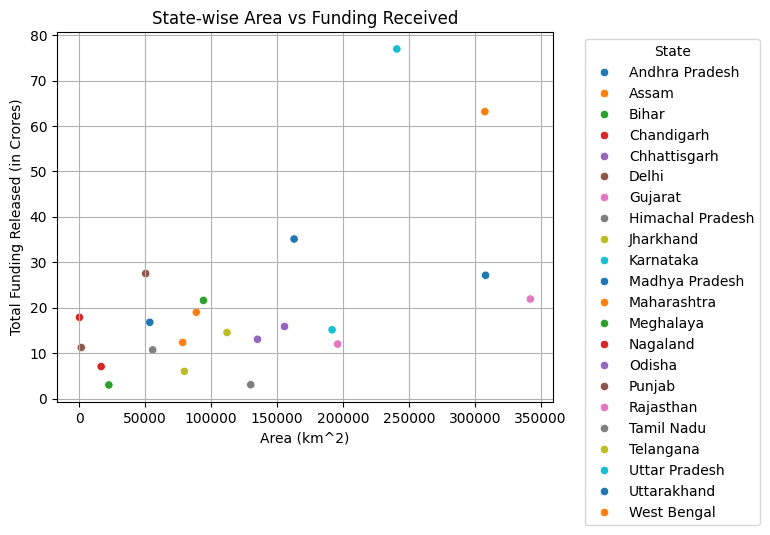

In [25]:
#Question -3 

Funding_df = Funding_df[["State", "Total fund released"]].copy()
merged_data = pd.merge(State_df, Funding_df, on="State", how="inner")
merged_data["Total fund released"] = pd.to_numeric(merged_data["Total fund released"], errors="coerce")
merged_data = merged_data.dropna()

cleaned_data = merged_data.groupby("State", as_index=False).agg({"Area (km2)": "first", "Total fund released": "sum" })

scatter = sns.scatterplot(data=cleaned_data,x="Area (km2)",y="Total fund released",hue="State",palette="tab10")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="State")
plt.xlabel("Area (km^2)")
plt.ylabel("Total Funding Released (in Crores)")
plt.title("State-wise Area vs Funding Received")
plt.grid()
plt.show()



# Miscellaneous Questions

In [ ]:
# Question 1

Data_df['Timestamp'] = pd.to_datetime(Data_df['Timestamp'])
year_2023 = Data_df[Data_df['Timestamp'].dt.year == 2023]

city_avg = year_2023.groupby('city')['PM2.5'].mean().reset_index()
most_polluted_city = city_avg.sort_values(by='PM2.5', ascending=False).iloc[0]['city']
city_data = year_2023[year_2023['city'] == most_polluted_city]

city_data['Date'] = city_data['Timestamp'].dt.date
daily_avg = city_data.groupby('Date')['PM2.5'].mean().reset_index()

total_days = len(daily_avg)
hazardous_days = len(daily_avg[daily_avg['PM2.5'] > 300])
if total_days > 0:
    percentage_hazardous = (hazardous_days / total_days) * 100
else:
    percentage_hazardous = 0 

print(percentage_hazardous)

0.821917808219178


C:\Users\heetp\AppData\Local\Temp\ipykernel_21980\3692284006.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Date'] = city_data['Timestamp'].dt.date


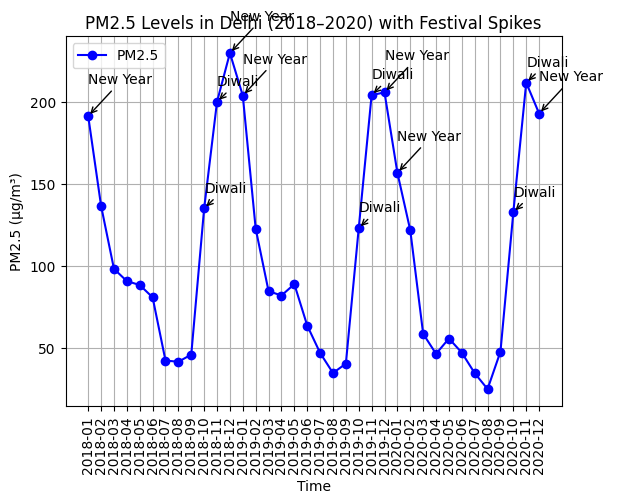

In [35]:
#Question -2

Data_df['Timestamp'] = pd.to_datetime(Data_df['Timestamp'])
delhi = Data_df[(Data_df['state'] == 'Delhi') & (Data_df['Timestamp'].dt.year.isin([2018, 2019, 2020]))]
monthly_avg = delhi.groupby(delhi['Timestamp'].dt.to_period('M'))['PM2.5'].mean()

fig, ax = plt.subplots()
ax.plot(monthly_avg.index.astype(str), monthly_avg.values, marker='o', color='blue', label='PM2.5')
for date, value in monthly_avg.items():
    month = date.month
    if month in [10, 11]:
        ax.annotate('Diwali', xy=(str(date), value), xytext=(str(date), value+10), arrowprops=dict(arrowstyle='->'))
    if month in [12, 1]:
        ax.annotate('New Year ', xy=(str(date), value), xytext=(str(date), value+20), arrowprops=dict(arrowstyle='->'))

plt.title('PM2.5 Levels in Delhi (2018–2020) with Festival Spikes')
plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid()
plt.xticks(rotation=90)
plt.legend()
plt.show()


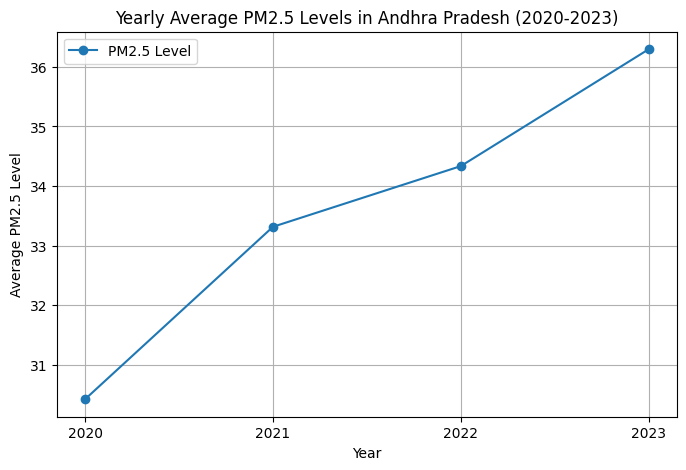

In [44]:

# Question 3
Data_df["Timestamp"] = pd.to_datetime(Data_df["Timestamp"], errors="coerce")
Data_df["Year"] = Data_df["Timestamp"].dt.year
ap_pm25_df = Data_df[(Data_df["state"] == "Andhra Pradesh") & (Data_df["Year"].between(2020, 2023))]
ap_pm25_trend = ap_pm25_df.groupby("Year")["PM2.5"].mean()


plt.figure(figsize=(8, 5))
plt.plot(ap_pm25_trend.index, ap_pm25_trend.values, marker="o", linestyle="-", label="PM2.5 Level")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title("Yearly Average PM2.5 Levels in Andhra Pradesh (2020-2023)")
plt.xticks(ap_pm25_trend.index)
plt.grid()
plt.legend()
plt.show()


,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,Year,geometry
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh,2017,POINT (81.31477 21.19482)
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh,2017,POINT (81.57898 21.25882)
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan,2017,POINT (75.83686 26.90291)
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra,2017,POINT (72.9986 19.1494)
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,POINT EMPTY


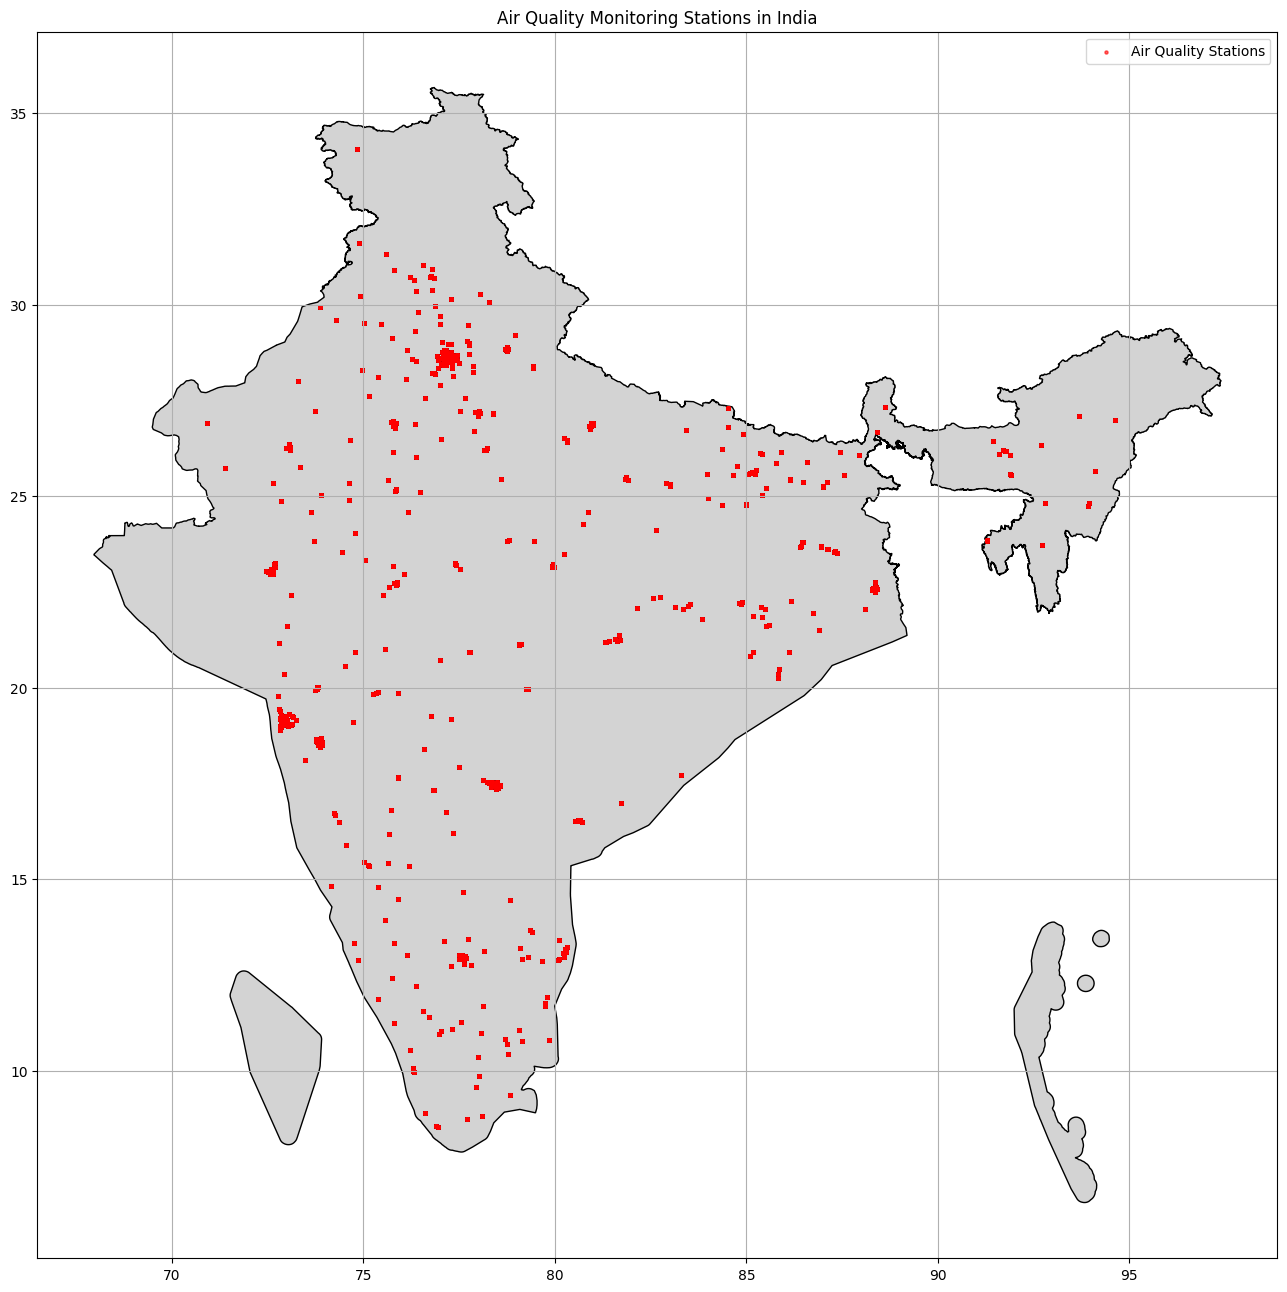

In [ ]:
#Question-4
import geopandas as gpd
india = gpd.read_file("https://nominatim.openstreetmap.org/search?country=India&polygon_geojson=1&format=geojson")
Data_df["Timestamp"] = pd.to_datetime(Data_df["Timestamp"])

Data_df["geometry"] = gpd.points_from_xy(Data_df["longitude"], Data_df["latitude"])
geo_data = gpd.GeoDataFrame(Data_df, geometry="geometry")

fig, ax = plt.subplots(figsize=(16, 20))
india.plot(ax=ax, color="lightgray", edgecolor="black")
geo_data.plot(ax=ax, markersize=5, color="red", alpha=0.6, label="Air Quality Stations")
plt.title("Air Quality Monitoring Stations in India")
plt.legend()
plt.grid()
plt.show()

# Tell something new

In [ ]:
'''states with high pollution levels could see a rise in respiratory diseases, hospitalizations, and long-term health issues,
contributing to higher healthcare expenditures. Integrating this information with NCAP funding data could help policymakers
assess whether the investments in air quality improvement are yielding tangible health benefits or if more targeted interventions 
are needed. Highlighting this link will emphasize the need for stricter regulations and green technology adoption to reduce healthcare 
burdens and improve public well-being. '''